In [ ]:
# MNIST dataset으로 CNN 모델 작성
# 세 가지 모델 모두 구현
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping
# Conv2D : 2차원 합성곱(Convolution)을 수행하는 레이어
# 이미지처럼 높이·너비·채널을 가진 입력에 필터(커널)를 슬라이딩하면서 특징맵(feature map)을 계산

In [53]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 구조 변경 (차원)
print(x_train.shape) # (60000, 28, 28)
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0 # 흑백이기 때문에 1을 준다
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
print(x_train.shape) # (60000, 28, 28, 1)

# 모델 정의
model = Sequential([
    Input(shape=(28,28, 1)),
    Conv2D(filters=16, kernel_size=(3, 3), strides=(1,1), padding='same', activation='leaky_relu'), # same(일반적, 패딩에 0을 채운다), valid(?)
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2), # 0.1 ~ 0.5 / Dense는 0.3 / Convolution에서는 0.1 ~ 0.2
    
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), padding='same', activation='leaky_relu'),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same', activation='leaky_relu'),
    MaxPool2D(pool_size=(2, 2)), # 여기까지 과정이 feature extraction
    
    Flatten(), # FCLayer => 1차원으로 축소
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(10, activation='softmax')
])
model.summary()


(60000, 28, 28)
(60000, 28, 28, 1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,634 (244.66 KB)

 Trainable params: 62,634 (244.66 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# 학습 방법
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(patience=3, restore_best_weights=True)

# 학습
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.1, callbacks=[es], verbose=2)


Epoch 1/100
422/422 - 11s - 25ms/step - accuracy: 0.6957 - loss: 1.8020 - val_accuracy: 0.9605 - val_loss: 0.3050
Epoch 2/100
422/422 - 7s - 17ms/step - accuracy: 0.8885 - loss: 1.2677 - val_accuracy: 0.9770 - val_loss: 0.2668
Epoch 3/100
422/422 - 7s - 17ms/step - accuracy: 0.9152 - loss: 1.0673 - val_accuracy: 0.9770 - val_loss: 0.2553
Epoch 4/100
422/422 - 7s - 17ms/step - accuracy: 0.9292 - loss: 0.7958 - val_accuracy: 0.9757 - val_loss: 0.2305
Epoch 5/100
422/422 - 7s - 18ms/step - accuracy: 0.9310 - loss: 0.6498 - val_accuracy: 0.9792 - val_loss: 0.1877
Epoch 6/100
422/422 - 8s - 18ms/step - accuracy: 0.9315 - loss: 0.5021 - val_accuracy: 0.9795 - val_loss: 0.1346
Epoch 7/100
422/422 - 8s - 18ms/step - accuracy: 0.9326 - loss: 0.4438 - val_accuracy: 0.9787 - val_loss: 0.1698
Epoch 8/100
422/422 - 8s - 18ms/step - accuracy: 0.9325 - loss: 0.5461 - val_accuracy: 0.9830 - val_loss: 0.1643
Epoch 9/100
422/422 - 7s - 18ms/step - accuracy: 0.9356 - loss: 0.7559 - val_accuracy: 0.9817 -

In [55]:
# 모델 평가
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'train_loss : {train_loss:.4f}, train_acc : {train_acc*100:.4f}%')
print(f'test_loss : {test_loss:.4f}, test_acc : {test_acc*100:.4f}%')

train_loss : 0.1655, train_acc : 97.6167%
test_loss : 0.1443, test_acc : 98.0700%


In [61]:
# 모델 저장
save_path = "/Users/bunny/Documents/git_practice/python_analysis/tensorflow/model/mnist_cnn.keras" # mnist_cnn_FuncAIP.keras / mnist_cnn.keras
# model.save(save_path)

# 모델 호출
loaded_model = load_model(save_path)
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=0)
print(f'train_loss : {train_loss:.4f}, train_acc : {train_acc*100:.4f}%')
print(f'test_loss : {test_loss:.4f}, test_acc : {test_acc*100:.4f}%')

train_loss : 0.1655, train_acc : 97.6167%
test_loss : 0.0238, test_acc : 99.2800%


In [63]:
# 기존 자료로 1개로 예측
idx = 0 # 원하는 값 입력

y_true = int(y_test[idx])    # 실제값
x_one = x_test[idx:idx+1]    # (1, 28, 28, 1)

probs = loaded_model.predict(x_one, verbose=0)
probs = probs.flatten()
print(probs)
y_pred = int(np.argmax(probs))
print(f"실제값 : {y_true}")
print(f"예측값 : {y_pred}")
print(f"예측값 확률 : {np.round(probs, 3)}")

[8.7835863e-09 2.7846258e-07 4.2656634e-07 5.0417508e-08 5.6365394e-08
 2.8742265e-08 1.3083268e-11 9.9999785e-01 2.1399307e-09 1.4135727e-06]
실제값 : 7
예측값 : 7
예측값 확률 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Epoch 1/100
422/422 - 16s - 38ms/step - accuracy: 0.9813 - loss: 0.0686 - val_accuracy: 0.9925 - val_loss: 0.0265
Epoch 2/100
422/422 - 13s - 30ms/step - accuracy: 0.9812 - loss: 0.0674 - val_accuracy: 0.9925 - val_loss: 0.0276
Epoch 3/100
422/422 - 13s - 31ms/step - accuracy: 0.9813 - loss: 0.0657 - val_accuracy: 0.9935 - val_loss: 0.0241
Epoch 4/100
422/422 - 13s - 30ms/step - accuracy: 0.9821 - loss: 0.0638 - val_accuracy: 0.9915 - val_loss: 0.0298
Epoch 5/100
422/422 - 12s - 29ms/step - accuracy: 0.9826 - loss: 0.0638 - val_accuracy: 0.9933 - val_loss: 0.0225
Epoch 6/100
422/422 - 12s - 29ms/step - accuracy: 0.9836 - loss: 0.0585 - val_accuracy: 0.9938 - val_loss: 0.0242
Epoch 7/100
422/422 - 12s - 30ms/step - accuracy: 0.9827 - loss: 0.0608 - val_accuracy: 0.9935 - val_loss: 0.0251
Epoch 8/100
422/422 - 12s - 30ms/step - accuracy: 0.9835 - loss: 0.0590 - val_accuracy: 0.9943 - val_loss: 0.0231


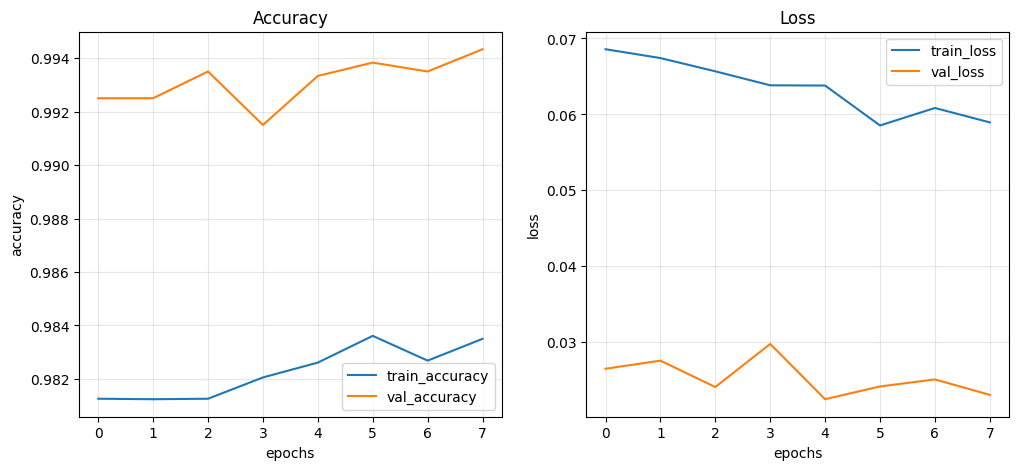

In [65]:
# 시각화 : 학습 곡선 ( 정확도 / 손실 )
# history = loaded_model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.1, callbacks=[es], verbose=2)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.show()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


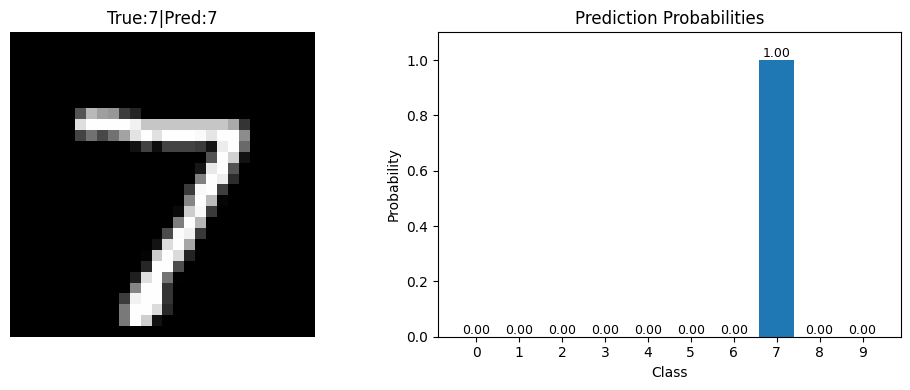

In [37]:
# 단일 이미지 + 예측 확률 막대 시각화
classes = [str(i) for i in range(10)]
print(classes)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(x_one[0].squeeze(), cmap='gray')
plt.axis('off') # 축 제거
plt.title(f"True:{y_true}|Pred:{y_pred}")

plt.subplot(1,2,2)
plt.bar(classes, probs)
plt.title('Prediction Probabilities')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.ylim(0, 1.1)
for i, v in enumerate(probs):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=9)
    
plt.tight_layout()
plt.show()

In [52]:
# --- preprocess + predict for CNN(MNIST) ---
from PIL import Image, ImageOps
# ImageOps : ImageOps는 Pillow(PIL) 의 유틸 모듈. 이미지에 자주 쓰는 후처리/기하 변환/톤 조정 기능들을 한 곳에 모아둔 것
import numpy as np
import tensorflow as tf

def preprocess_mnist(path, invert="auto"):
    im = Image.open(path).convert("L")

    try:
        im = ImageOps.pad(im, (28, 28), method=Image.Resampling.LANCZOS, color=255, centering=(0.5, 0.5))
    except AttributeError:
        im = ImageOps.pad(im, (28, 28), color=255, centering=(0.5, 0.5))

    img = np.asarray(im).astype("float32")  # (28, 28), 0..255

    # MNIST는 "검은 배경(0), 흰 글씨(255)". 배경이 밝으면 자동 반전
    if invert == "auto":
        if img.mean() > 127:
            img = 255.0 - img
    elif invert is True:
        img = 255.0 - img

    # 정규화 + 채널 차원 추가 → (1, 28, 28, 1)
    img = img / 255.0
    img = np.expand_dims(img, axis=(0, -1))
    return img

mymodel = load_model(save_path)

# 내 이미지 전처리 & 예측
data = preprocess_mnist('/Users/bunny/Documents/git_practice/python_analysis/tensorflow/digits/1.png')             # shape (1, 28, 28, 1)
new_pred = mymodel.predict(data, verbose=0)   # shape (1, 10)

pred_class = int(np.argmax(new_pred, axis=1)[0])
pred_conf  = float(new_pred[0, pred_class])
print('probs  :', np.round(new_pred, 4))
print('class  :', pred_class)
print('conf   :', pred_conf)

probs  : [[0.0825 0.0539 0.4077 0.3425 0.     0.057  0.     0.0109 0.0353 0.0103]]
class  : 2
conf   : 0.4077041745185852


[7 2 1 ... 4 5 6]


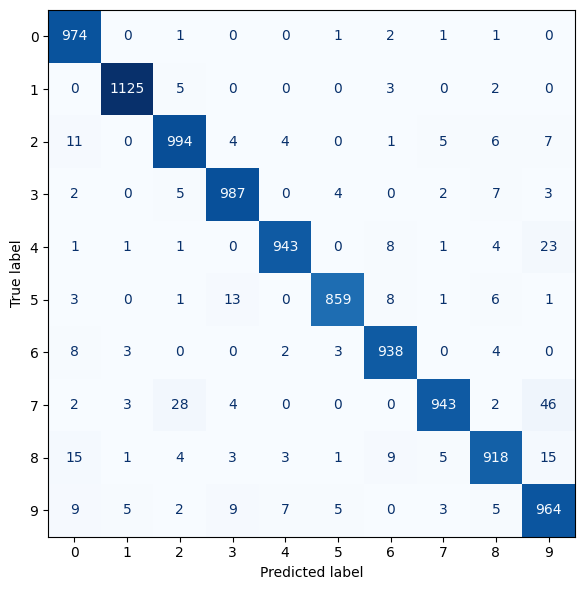

In [34]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_all = np.argmax(loaded_model.predict(x_test, verbose=0), axis=1)
print(y_pred_all)
cm = confusion_matrix(y_test, y_pred_all, labels=list(range(10)))
disp = ConfusionMatrixDisplay(cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
plt.tight_layout()
plt.show()